In [3]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np
from PIL import Image
import glob
import pandas as pd

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Conectando com as pastas do Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lendo o arquivo de metadados das imagens e adicionando em uma variável

In [9]:
df = pd.read_csv('/content/drive/My Drive/TCC/TCC.csv')
len(df)

23906

In [10]:
column_names = ['isic_id','age_approx','anatom_site_general','benign_malignant','clin_size_long_diam_mm','diagnosis','diagnosis_confirm_type','family_hx_mm','mel_class','mel_thick_mm','melanocytic','nevus_type','personal_hx_mm','sex']
df_malignant = pd.DataFrame(columns = column_names)
df_malignant

,isic_id,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,diagnosis,diagnosis_confirm_type,family_hx_mm,mel_class,mel_thick_mm,melanocytic,nevus_type,personal_hx_mm,sex


In [12]:
for index, row in df.iterrows():
    if row[3] == 'malignant':
        df_malignant = df_malignant.append(row)
df_malignant

,isic_id,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,diagnosis,diagnosis_confirm_type,family_hx_mm,mel_class,mel_thick_mm,melanocytic,nevus_type,personal_hx_mm,sex
2,ISIC_0000002,60.0,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female
4,ISIC_0000004,80.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,male
13,ISIC_0000013,30.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female
22,ISIC_0000022,55.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female
26,ISIC_0000026,30.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23878,ISIC_0034294,70.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female
23897,ISIC_0034313,55.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,male
23900,ISIC_0034316,85.0,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,male
23901,ISIC_0034317,70.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,True,NaN,NaN,female


In [13]:
column_names = ['isic_id','age_approx','anatom_site_general','benign_malignant','clin_size_long_diam_mm','diagnosis','diagnosis_confirm_type','family_hx_mm','mel_class','mel_thick_mm','melanocytic','nevus_type','personal_hx_mm','sex']
df_benign = pd.DataFrame(columns = column_names)
df_benign

,isic_id,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,diagnosis,diagnosis_confirm_type,family_hx_mm,mel_class,mel_thick_mm,melanocytic,nevus_type,personal_hx_mm,sex


In [14]:
for index, row in df.iterrows():
    if row[3] == 'benign':
        df_benign = df_benign.append(row)
df_benign

,isic_id,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,diagnosis,diagnosis_confirm_type,family_hx_mm,mel_class,mel_thick_mm,melanocytic,nevus_type,personal_hx_mm,sex
0,ISIC_0000000,55.0,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,True,NaN,NaN,female
1,ISIC_0000001,30.0,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,True,NaN,NaN,female
3,ISIC_0000003,30.0,upper extremity,benign,NaN,nevus,NaN,NaN,NaN,NaN,True,NaN,NaN,male
5,ISIC_0000005,40.0,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,True,NaN,NaN,female
6,ISIC_0000006,25.0,posterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,True,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23895,ISIC_0034311,55.0,posterior torso,benign,NaN,nevus,histopathology,NaN,NaN,NaN,True,NaN,NaN,male
23896,ISIC_0034312,40.0,NaN,benign,NaN,nevus,single image expert consensus,NaN,NaN,NaN,True,NaN,NaN,female
23898,ISIC_0034314,50.0,anterior torso,benign,NaN,nevus,histopathology,NaN,NaN,NaN,True,NaN,NaN,male
23903,ISIC_0034319,30.0,NaN,benign,NaN,nevus,histopathology,NaN,NaN,NaN,True,NaN,NaN,male


# Colocando todas as imagens em uma variável e ajustando o seu tamanho

In [19]:
matrizImagens = []
matrizTipos = []

for img in glob.glob("TCC/dataset_treino/benigno/*.jpg"):
    n = Image.open(img)
    n = n.resize((100,100))
    n = np.array(n)
    matrizImagens.append(n)
    
    #teste = img[16:28]
    
    #if teste in df_malignant.values:
     #   matrizTipos.append(1)
                
   #if teste in df_benign.values:
    matrizTipos.append(0)
        
 #   print(teste)

In [20]:
for img in glob.glob("TCC/dataset_treino/maligno/*.jpg"):
    n = Image.open(img)
    n = n.resize((100,100))
    n = np.array(n)
    matrizImagens.append(n)
    
    #teste = img[16:28]
    
    #if teste in df_malignant.values:
     #   matrizTipos.append(1)
                
   #if teste in df_benign.values:
    matrizTipos.append(1)
        
 #   print(teste)

# Convertendo a variável array para numpy array

In [21]:
matrizImagens = np.array(matrizImagens)
matrizTipos = np.array(matrizTipos)

# Verificando se todas as imagens foram processadas

In [ ]:
print(len(matrizImagens))
print(len(matrizTipos))

21659
21659


In [ ]:
np.shape(matrizImagens)

In [24]:
matrizTipos

array([], dtype=float64)

# Fazendo o reshape para que o Smote possa processar

In [ ]:
RmatrizImagens = np.array(matrizImagens).reshape(20,100*100*3)
RmatrizImagens

# Executando o a função Smote

In [ ]:
# transform the dataset
oversample = SMOTE(k_neighbors=3)
matrizImagens, matrizTipos = oversample.fit_resample(RmatrizImagens, matrizTipos)

In [ ]:
len(matrizImagens)

30

In [ ]:
matrizTipos

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# Passando as imagens para uma variável

In [ ]:
testereshape = []
for x in range(len(matrizImagens)):
    n = matrizImagens[x].reshape(100,100,3)
    testereshape.append(n)

# Visualizando o número de pixels de uma imagem

In [ ]:
testereshape[0]

array([[[253, 253, 253],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 255],
        [253, 253, 255],
        [253, 253, 255]],

       [[253, 253, 255],
        [253, 253, 255],
        [252, 253, 255],
        ...,
        [213, 215, 219],
        [213, 215, 219],
        [213, 215, 219]],

       ...,

       [[231, 234, 236],
        [231, 234, 236],
        [231, 234, 236],
        ...,
        [252, 255, 255],
        [252, 255, 255],
        [252, 255, 255]],

       [[252, 255, 255],
        [252, 255, 255],
        [252, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
from matplotlib import image
from matplotlib import pyplot

# Verificando as características da variável

In [ ]:
np.dtype(testereshape)

In [ ]:
np.shape(testereshape)

(30, 3072, 2304, 3)

In [ ]:
np.max(testereshape)

255

In [ ]:
np.min(testereshape)

0

#Plotando a imagem após o uso do Smote

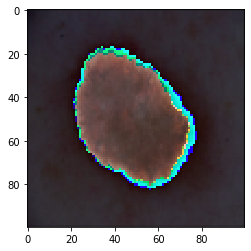

In [ ]:
pyplot.imshow(testereshape[29])